In [22]:
#Importing the libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit
import uncertainties as u 
from uncertainties import ufloat
from uncertainties.umath import *
from uncertainties import unumpy

In [23]:
# Constants and values

I_0_s = 2.188*10**(3) #mV
I_0_p = 3.788*10**(3) #mV

d = ufloat(10.193, 0.0785854100114435) #m

radians = np.pi/180
degrees = 180/np.pi

In [24]:
#Reading data

data = pd.read_excel('data/data.xlsx')

In [25]:
# Calculation 

data['I_s'] = data['I_s']
data['I_p'] = data['I_p']

data['I_mean'] = (data['I_s'] + data['I_p']) / 2 

data['R_s'] = data['I_s'] / I_0_s
data['R_p'] = data['I_p'] / I_0_p

data['R_mean'] = (data['R_s'] + data['R_p']) / 2

phi_b = ufloat(data['phi_min'][4], 0.1)

n = ufloat(np.tan(np.radians(phi_b.nominal_value)), np.tan(np.radians(phi_b.std_dev)))

print('n =', n)

data['n_under'] = np.sqrt(((1+np.sqrt(data['R_s'][2:5]))*(1+np.sqrt(data['R_p'][2:5])))/((1-np.sqrt(data['R_s'][2:5]))*(1-np.sqrt(data['R_p'][2:5]))))
data['n_up'] = np.sqrt(((1+np.sqrt(data['R_s'][5:8]))*(1-np.sqrt(data['R_p'][5:8])))/((1-np.sqrt(data['R_s'][5:8]))*(1+np.sqrt(data['R_p'][5:8]))))

n_mean = ufloat(np.mean(np.array(data['n_under'][2:5],data['n_up'][5:8])), np.std(np.array(data['n_under'][2:5],data['n_up'][5:8])))

print('n_mean =', n_mean)

phi_1 = []
for ii,ID in enumerate(data['phi']):
    phi_1.append(degrees *(asin(sin(radians * (data['phi'][ii]))/n_mean)))
data['phi_1'] = phi_1

R_s_1 = []
for ii,ID in enumerate(data['phi']):
    R_s_1.append(np.abs(-1*sin(radians * (data['phi'][ii]-data['phi_1'][ii])) / sin(radians * (data['phi'][ii]+data['phi_1'][ii])))**2)
data['R_s_1'] = R_s_1

R_p_1 = []
for ii,ID in enumerate(data['phi']):
    R_p_1.append(np.abs(-1*tan(radians * (data['phi'][ii]-data['phi_1'][ii])) / tan(radians * (data['phi'][ii]+data['phi_1'][ii])))**2)
data['R_p_1'] = R_p_1

data['R_mean_1'] = (data['R_s_1'] + data['R_p_1']) / 2

n_2 = []
for ii,ID in enumerate(data['alpha']):
    n_2.append(sqrt(sin(radians*np.array(data['alpha'][ii]))**2 + (1 - (data['x_1'][ii] / (d*sin(radians*data['alpha'][ii]))))**(-2)*np.cos(radians*data['alpha'][ii])**2))
data['n_2'] = n_2

x_teor = []
for ii,ID in enumerate(data['alpha']):
    # x_teor.append((1 - np.cos(np.radians(data['alpha'][ii])) / sqrt(n**2 - np.sin(np.radians(data['alpha'][ii]))**2)) * d * np.sin(np.radians(data['alpha'][ii])))
    # x_teor.append((1 - np.cos(np.radians(data['alpha'][ii])) / sqrt(n_mean**2 - np.sin(np.radians(data['alpha'][ii]))**2)) * d * np.sin(np.radians(data['alpha'][ii])))
     x_teor.append((1 - np.cos(np.radians(data['alpha'][ii])) / sqrt(n_2_mean**2 - np.sin(np.radians(data['alpha'][ii]))**2)) * d * np.sin(np.radians(data['alpha'][ii])))
data['x_teor'] = x_teor

n_2_val = []
n_2_err = []

for ii,ID in enumerate(data['n_2']):
    n_2_val.append(data['n_2'][ii].nominal_value)
    n_2_err.append(data['n_2'][ii].std_dev)

n_2_mean = ufloat(np.mean(np.array(n_2_val)), np.sqrt(np.std(np.array(n_2_err))**2+np.mean(np.array(n_2_err))**2))

print('n_2_mean =', n_2_mean)

# print(data)

n = 1.4826+/-0.0017
n_mean = 1.418+/-0.026
n_2_mean = 1.501+/-0.007


C:\Users\shepo\AppData\Local\Temp\ipykernel_7396\4227368400.py:33: RuntimeWarning: invalid value encountered in absolute
  R_s_1.append(np.abs(-1*sin(radians * (data['phi'][ii]-data['phi_1'][ii])) / sin(radians * (data['phi'][ii]+data['phi_1'][ii])))**2)
C:\Users\shepo\AppData\Local\Temp\ipykernel_7396\4227368400.py:38: RuntimeWarning: invalid value encountered in absolute
  R_p_1.append(np.abs(-1*tan(radians * (data['phi'][ii]-data['phi_1'][ii])) / tan(radians * (data['phi'][ii]+data['phi_1'][ii])))**2)


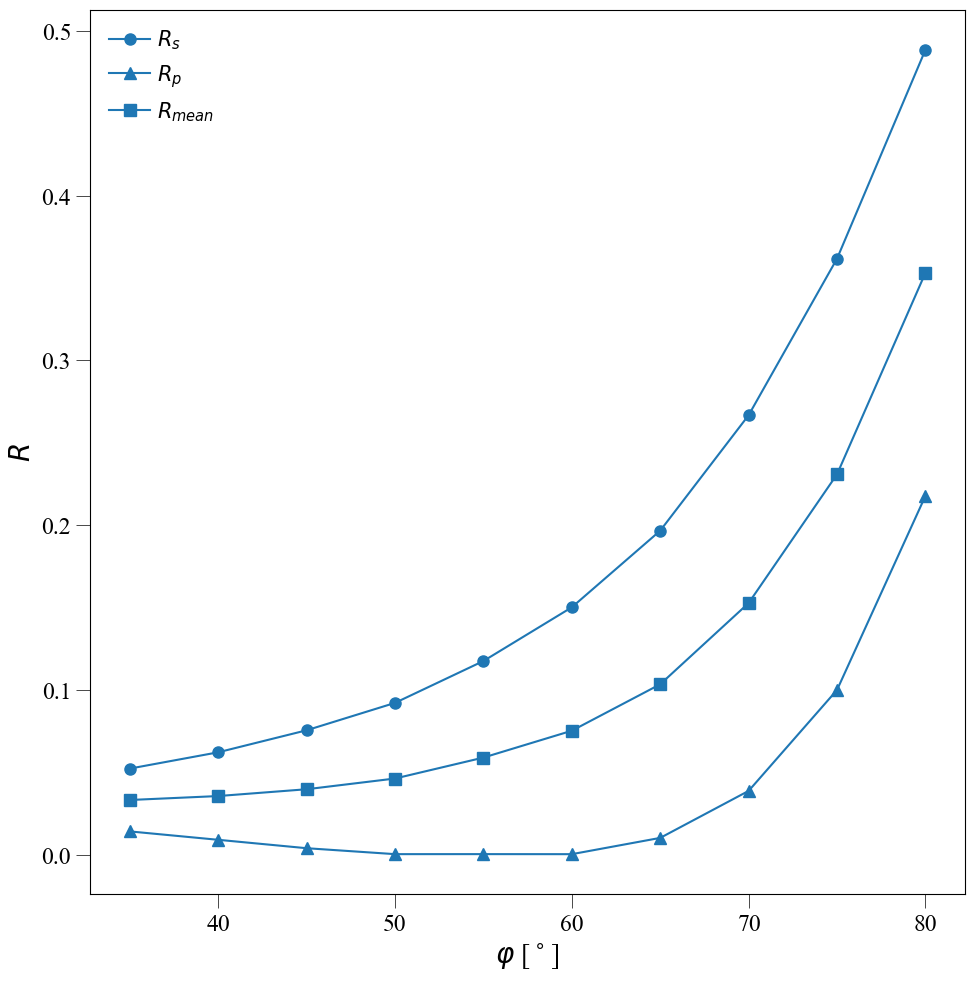

In [26]:
# Plot the data 

colors = ['#FF7F0E','#D62728','#FFDB58','#2CA02C','#17BECF','#1F77B4','#F0027F']  

plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(10, 10))

# ax.title.set_fontsize(20)
ax.set_xlabel(r"$\varphi$ [$^\circ$]")
ax.set_ylabel(r"$R$")
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=17)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=17)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.plot(data['phi'], data['R_s'], c=colors[5], marker='o', markersize=8, label=r"$R_s$")
ax.plot(data['phi'], data['R_p'], c=colors[5], marker='^', markersize=8, label=r"$R_p$")
ax.plot(data['phi'], data['R_mean'], c=colors[5], marker='s', markersize=8, label=r"$R_{mean}$")


handles, labels = ax.get_legend_handles_labels()
order = [0, 1, 2]

ax.legend([handles[i] for i in order], [labels[i] for i in order]
        ,frameon=False, loc="upper left", 
        #   bbox_to_anchor=(1, 1.0),
		  fontsize=15, ncol=1, handletextpad=0.3)


plt.show() 

# fig.savefig('images/amplituda.png', bbox_inches='tight')

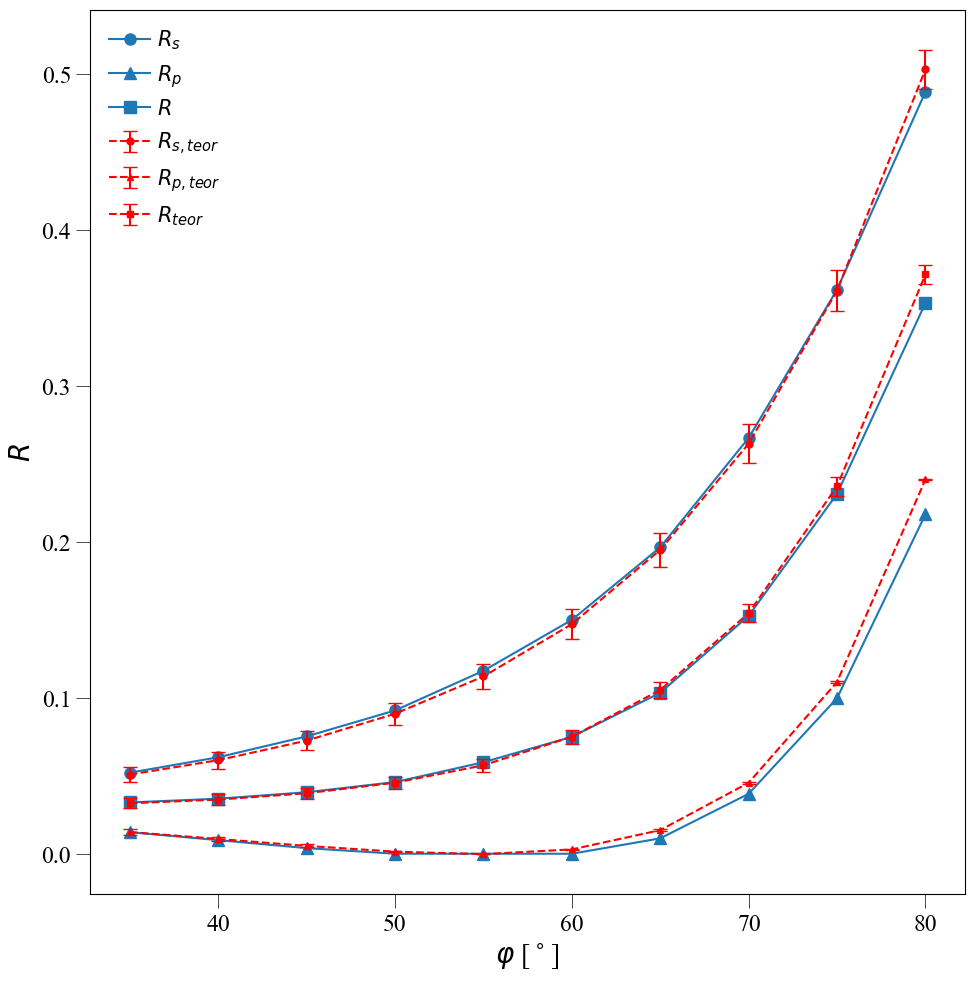

In [27]:
# Plot the data 

colors = ['#FF7F0E','#D62728','#FFDB58','#2CA02C','#17BECF','#1F77B4','#F0027F']  

plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(10, 10))

# ax.title.set_fontsize(20)
ax.set_xlabel(r"$\varphi$ [$^\circ$]")
ax.set_ylabel(r"$R$")
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=17)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=17)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.plot(data['phi'], data['R_s'], c=colors[5], marker='o', markersize=8, linestyle='-', label=r"$R_s$")
ax.plot(data['phi'], data['R_p'], c=colors[5], marker='^', markersize=8, linestyle='-', label=r"$R_p$")
ax.plot(data['phi'], data['R_mean'], c=colors[5], marker='s', markersize=8, linestyle='-', label=r"$R$")


# ax.scatter(data['phi'], data['R_s_1'], c='red', marker='o', s=50, label=r"$R_{s,teor}$")
# ax.scatter(data['phi'], data['R_p_1'], c='red', marker='^', s=50, label=r"$R_{p,teor}$")
# ax.scatter(data['phi'], data['R_mean_1'], c='red', marker='s', s=50, label=r"$R_{teor}$")

ax.errorbar(data['phi'], data['R_s_1'].apply(lambda x: x.nominal_value) , yerr=data['R_s_1'].apply(lambda x: x.std_dev), c='red', marker='o', linestyle='--', markersize=5, capsize=5, label=r"$R_{s,teor}$")
ax.errorbar(data['phi'], data['R_p_1'].apply(lambda x: x.nominal_value) , yerr=data['R_p_1'].apply(lambda x: x.std_dev), c='red', marker='^', linestyle='--', markersize=5, capsize=5, label=r"$R_{p,teor}$")
ax.errorbar(data['phi'], data['R_mean_1'].apply(lambda x: x.nominal_value) , yerr=data['R_mean_1'].apply(lambda x: x.std_dev), c='red', marker='s', linestyle='--', markersize=5, capsize=5, label=r"$R_{teor}$")


# ax.plot(data['phi'], data['R_s_1'], c='red', linestyle='--')
# ax.plot(data['phi'], data['R_p_1'], c='red', linestyle='--')
# ax.plot(data['phi'], data['R_mean_1'], c='red', linestyle='--')


handles, labels = ax.get_legend_handles_labels()
order = [0, 1, 2, 3, 4, 5]

ax.legend([handles[i] for i in order], [labels[i] for i in order]
        ,frameon=False, loc="upper left", 
        #   bbox_to_anchor=(1, 1.0),
		  fontsize=15, ncol=1, handletextpad=0.3)


plt.show() 

# fig.savefig('images/amplituda_2.png', bbox_inches='tight')

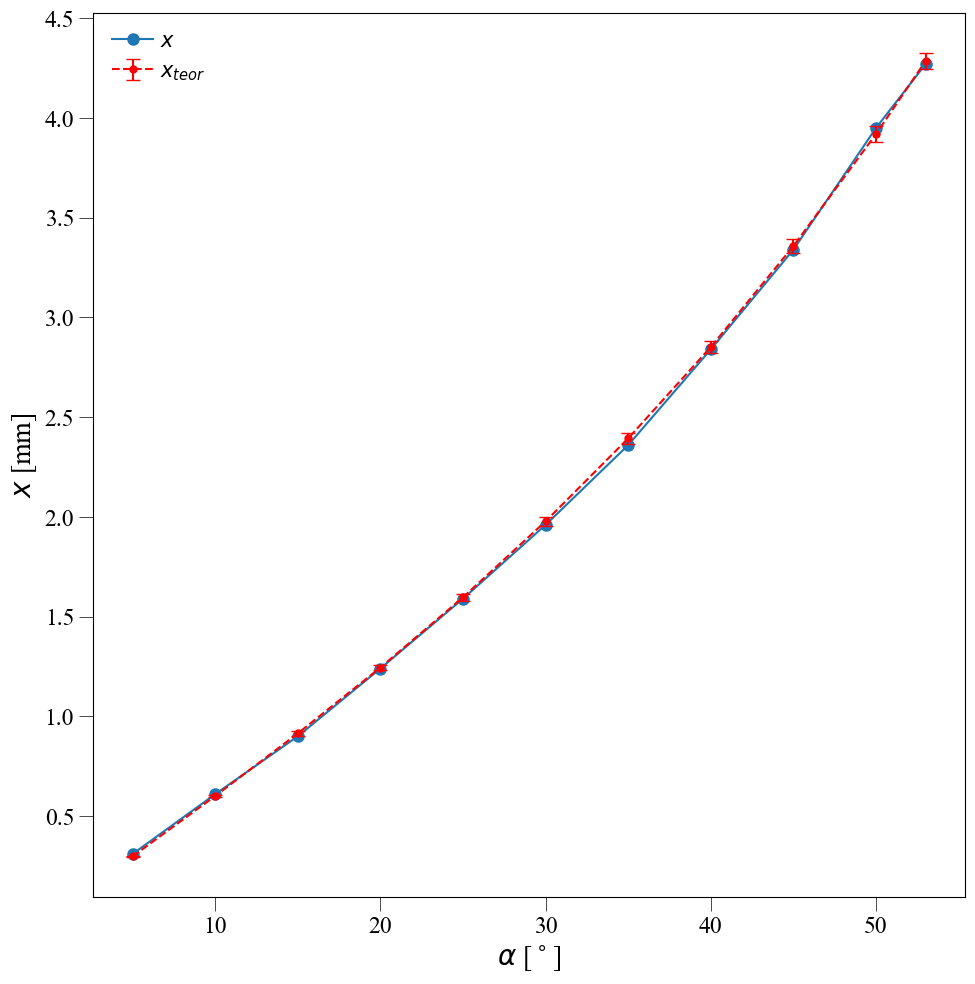

In [28]:
# Plot the data 

colors = ['#FF7F0E','#D62728','#FFDB58','#2CA02C','#17BECF','#1F77B4','#F0027F']  

plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(10, 10))

# ax.title.set_fontsize(20)
ax.set_xlabel(r"$\alpha$ [$^\circ$]")
ax.set_ylabel(r"$x$ [mm]")
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=17)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=17)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.plot(data['alpha'], data['x_1'], c=colors[5], marker='o', markersize=8, linestyle='-', label=r"$x$")
ax.errorbar(data['alpha'], data['x_teor'].apply(lambda x: x.nominal_value) , yerr=data['x_teor'].apply(lambda x: x.std_dev), c='red', marker='o', linestyle='--', markersize=5, capsize=5, label=r"$x_{teor}$")



handles, labels = ax.get_legend_handles_labels()
order = [0, 1]

ax.legend([handles[i] for i in order], [labels[i] for i in order]
        ,frameon=False, loc="upper left", 
        #   bbox_to_anchor=(1, 1.0),
		  fontsize=15, ncol=1, handletextpad=0.3)


plt.show() 

# fig.savefig('images/alpha.png', bbox_inches='tight')